# Koth Stats

In [1]:
import random


import pandas as pd
import numpy as np


from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure
from matplotlib.axes import Axes
import matplotlib.pyplot as plt

import seaborn as sns

import koth_stats.stats as ks

Helper function to display a ``figure.Figure`` into a ``pyplot`` figure.

In [2]:
def display_figure(fig: Figure, ax: Axes):
    canvas = FigureCanvasAgg(fig)
    canvas.draw()
    rgba = np.asarray(canvas.buffer_rgba())

    ax.imshow(rgba)
    ax.axis('off')


## Examples

### Game 1: Classic random game

Create dummy data

In [3]:
players_g1 = ["Alice", "Bob", "John", "Marco", "Chrichri"]

nb_transitions = int(2 * len(players_g1))

transitions_df_g1 = pd.DataFrame({
    "Name": random.choices(players_g1, k=nb_transitions),
    "Duration": [random.randint(0, 100) for _ in range(nb_transitions)]
})
transitions_df_g1

,Name,Duration
0,Bob,33
1,Chrichri,78
2,Chrichri,92
3,Marco,22
4,Chrichri,7
5,Alice,33
6,Chrichri,2
7,Chrichri,81
8,John,3
9,Alice,91


Initialize the ``KothStatService``

In [4]:
ks_service = ks.KothStatService(players_g1, transitions_df_g1)

Use it to display stats and the score.

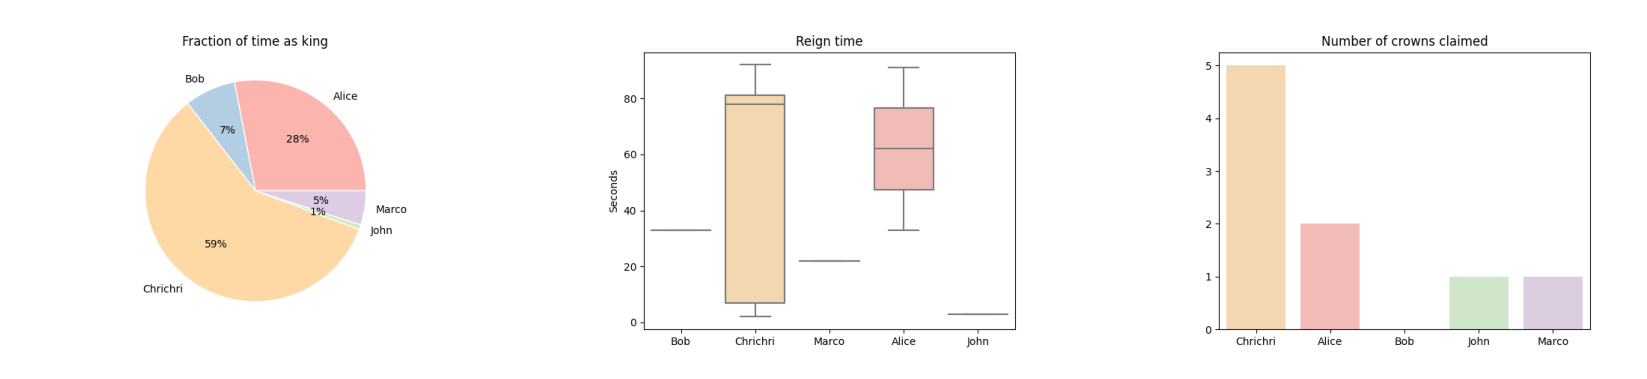

In [5]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(21, 7)
display_figure(ks_service.total_reign_time.plot(include_title=True), ax=axs[0])
display_figure(ks_service.reign_time.plot(include_title=True), ax=axs[1])
display_figure(ks_service.crowns_claimed.plot(include_title=True), ax=axs[2])

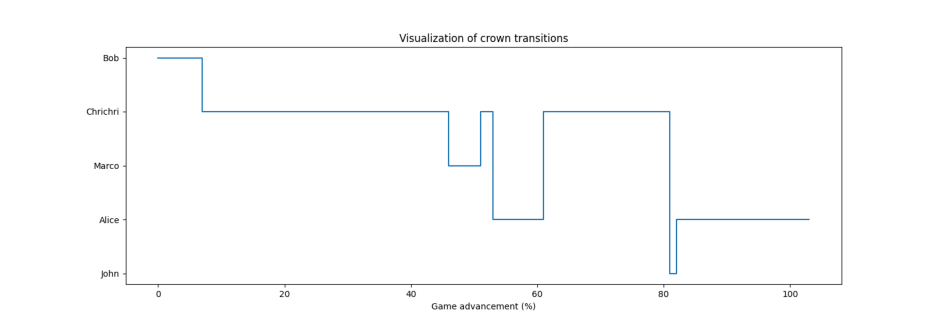

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 4)
display_figure(ks_service.graph_visualization.plot(include_title=True), ax=ax)

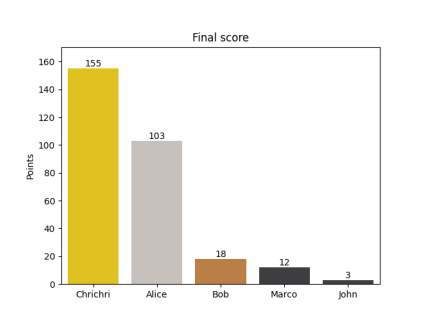

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 4)
display_figure(ks_service.points_plot(include_title=True), ax=ax)